In [1]:
import pandas as pd
import json
from datetime import datetime

# Preprocessing data

We will assume the ArXiv dataset has been downloaded and extracted into the analysis folder. First, we will load the articles in the category of nuclear experiments in the Pandas data frame. The following script also preprocesses the authors' names and the published date of the papers.

Data is available on https://www.kaggle.com/Cornell-University/arxiv

In [2]:
def get_clean_authors(authors):
    r = []
    for a in authors:
        r.append(" ".join(a).strip())
    return r

In [3]:
articles = []
category = 'nucl-ex'
with open("arxiv-metadata-oai-snapshot.json", "r") as f:
    for l in f:
        d = json.loads(l)
        if category in d['categories'].split(' '):
            d['clean_authors'] = get_clean_authors(d['authors_parsed']) 
            articles.append(d)

articles_df = pd.DataFrame().from_records(articles)
articles_df['created_date'] = [datetime.strptime(date[0]['created'].split(',')[1],' %d %b %Y %H:%M:%S %Z') 
                               for date in articles_df['versions']]
articles_df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,clean_authors,created_date
0,0704.0075,Xiang Liu,"Chong Chen, Xiao-Lin Chen, Xiang Liu, Wei-Zhen...",Strong decays of charmed baryons,"13 pages, 9 figures, 9 tables. Some descriptio...","Phys.Rev.D75:094017,2007",10.1103/PhysRevD.75.094017,None,hep-ph hep-ex nucl-ex,None,There has been important experimental progre...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-11-26,"[[Chen, Chong, ], [Chen, Xiao-Lin, ], [Liu, Xi...","[Chen Chong, Chen Xiao-Lin, Liu Xiang, Deng We...",2007-04-01 09:45:55
1,0704.0154,Ulrich Mosel,"Fabian Eichstaedt, Stefan Leupold, Ulrich Mose...",Hadrons in Medium -- Theory confronts experiment,"Key Lecture at YKIS2006, Kyoto, Dec. 2006","Prog.Theor.Phys.Suppl.168:495-502,2007",10.1143/PTPS.168.495,None,nucl-th hep-ph nucl-ex,None,In this talk we briefly summarize our theore...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Eichstaedt, Fabian, ], [Leupold, Stefan, ], ...","[Eichstaedt Fabian, Leupold Stefan, Mosel Ulri...",2007-04-02 09:36:31
2,0704.0200,Martin Schumacher,Martin Schumacher,Electromagnetic polarizabilities and the excit...,None,"Eur.Phys.J.A31:327-333,2007",10.1140/epja/i2006-10235-1,None,hep-ph nucl-ex,None,The electromagnetic polarizabilities of the ...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-06-26,"[[Schumacher, Martin, ]]",[Schumacher Martin],2007-04-02 14:10:13
3,0704.0220,Jason Ulery,Jason Glyndwr Ulery (for the STAR Collaboration),Three Particle Correlations from STAR,"Talk given at IWCF 2006, Hangzhou, China. 8 Pa...","Int.J.Mod.Phys.E16:3123-3130,2008",10.1142/S0218301307009117,None,nucl-ex,None,Two-particle correlations have shown modific...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Ulery, Jason Glyndwr, , for the STAR Collabo...",[Ulery Jason Glyndwr for the STAR Collaboration],2007-04-02 15:45:49
4,0704.0224,Jason Ulery,Jason Glyndwr Ulery (for the STAR Collaboration),Are There Mach Cones in Heavy Ion Collisions? ...,"Poster shown at Quark Matter 2006, Shanghai, C...","Int.J.Mod.Phys.E16:2005-2010,2007",10.1142/S0218301307007374,None,nucl-ex,None,We present results from STAR on 3-particle a...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Ulery, Jason Glyndwr, , for the STAR Collabo...",[Ulery Jason Glyndwr for the STAR Collaboration],2007-04-02 15:55:08


If we take a look at a random abstract text, we can notice that the text is available in the Latex format:

In [4]:
articles_df['abstract'][2]

'  The electromagnetic polarizabilities of the nucleon are shown to be\nessentially composed of the nonresonant $\\alpha_p(E_{0+})=+3.2$,\n$\\alpha_n(E_{0+})=+4.1$,the $t$-channel $\\alpha^t_{p,n}=-\\beta^t_{p,n}=+7.6$\nand the resonant $\\beta_{p,n}(P_{33}(1232))=+8.3$ contributions (in units of\n$10^{-4}$fm$^3$. The remaining deviations from the experimental data\n$\\Delta\\alpha_p=1.2\\pm 0.6$, $\\Delta\\beta_p=1.2\\mp 0.6$, \\Delta\\alpha_n=0.8\\pm\n1.7$ and $\\Delta\\beta_n=2.0\\mp 1.8$ are contributed by a larger number of\nresonant and nonresonant processes with cancellations between the\ncontributions. This result confirms that dominant contributions to the electric\nand magnetic polarizabilities may be represented in terms of two-photon\ncouplings to the $\\sigma$-meson having the predicted mass $m_\\sigma=666$ MeV\nand two-photon width $\\Gamma_{\\gamma\\gamma}=2.6$ keV.\n'

We will transform both the title and abstract text to UTF-8 format using the pylatexenc library.

In [4]:
from pylatexenc.latex2text import LatexNodes2Text

In [6]:
LatexNodes2Text().latex_to_text(articles_df['abstract'][2]).replace('\n', ' ').strip()

'The electromagnetic polarizabilities of the nucleon are shown to be essentially composed of the nonresonant α_p(E_0+)=+3.2, α_n(E_0+)=+4.1,the t-channel α^t_p,n=-β^t_p,n=+7.6 and the resonant β_p,n(P_33(1232))=+8.3 contributions (in units of 10^-4fm^3. The remaining deviations from the experimental data Δα_p=1.2± 0.6, Δβ_p=1.2∓ 0.6, Δα_n=0.8±1.7andΔβ_n=2.0∓1.8are contributed by a larger number of resonant and nonresonant processes with cancellations between the contributions. This result confirms that dominant contributions to the electric and magnetic polarizabilities may be represented in terms of two-photon couplings to theσ-meson having the predicted massm_σ=666MeV and two-photon widthΓ_γγ=2.6keV.'

In [5]:
# LaTex to UTF
clean_abstract = []
clean_title = []
for i,a in articles_df.iterrows():
    # Clean title
    try:
        clean_title.append(LatexNodes2Text().latex_to_text(a['title']).replace('\n', ' ').strip()) 
    except:
        clean_title.append(a['abstract'].replace('\n', ' ').strip())
    # Clean abstract
    try:
        clean_abstract.append(LatexNodes2Text().latex_to_text(a['abstract']).replace('\n', ' ').strip()) 
    except:
        clean_abstract.append(a['abstract'].replace('\n', ' ').strip())
articles_df['clean_abstracts'] = clean_abstract
articles_df['clean_title'] = clean_title

In [6]:
articles_df.head()[['id','clean_title','clean_authors','created_date','clean_abstracts']]

,id,clean_title,clean_authors,created_date,clean_abstracts
0,0704.0075,Strong decays of charmed baryons,"[Chen Chong, Chen Xiao-Lin, Liu Xiang, Deng We...",2007-04-01 09:45:55,There has been important experimental progress...
1,0704.0154,Hadrons in Medium – Theory confronts experiment,"[Eichstaedt Fabian, Leupold Stefan, Mosel Ulri...",2007-04-02 09:36:31,In this talk we briefly summarize our theoreti...
2,0704.0200,Electromagnetic polarizabilities and the excit...,[Schumacher Martin],2007-04-02 14:10:13,The electromagnetic polarizabilities of the nu...
3,0704.0220,Three Particle Correlations from STAR,[Ulery Jason Glyndwr for the STAR Collaboration],2007-04-02 15:45:49,Two-particle correlations have shown modificat...
4,0704.0224,Are There Mach Cones in Heavy Ion Collisions? ...,[Ulery Jason Glyndwr for the STAR Collaboration],2007-04-02 15:55:08,We present results from STAR on 3-particle azi...


# Graph import
After some initial data wrangling, we can go ahead and import the data into Neo4j. The graph schema is quite simple. We have Article and Author nodes, and a WROTE relationship between the two, indicating who are the authors of a particular article.

In [12]:
from neo4j import GraphDatabase
driver = GraphDatabase.driver('bolt://localhost:7687', auth=('neo4j', 'letmein'))

## Define unique constraints

As with most Neo4j projects, it is advisable first to define the unique constraints for nodes. This way, the import will be faster as the unique identifiers of the nodes will be indexed. We will create unique constraints for both the Article and the Author nodes.

In [11]:
with driver.session() as session:
    session.run('CREATE CONSTRAINT article IF NOT EXISTS ON (a:Article) ASSERT a.id IS UNIQUE;')
    session.run('CREATE CONSTRAINT authors IF NOT EXISTS ON (a:Author) ASSERT a.name IS UNIQUE;')

The dataset and the unique constraints are ready, so we can go ahead and import the graph. An important thing to notice is that when you are using your favorite scripting language with Neo4j Driver to import the data, we never want to run a single transaction for each line but instead want to batch several lines together into a single transaction. In our case, we batch every 2000 lines into a single transaction.

In [13]:
import_query = """

UNWIND $data as row
CREATE (a:Article)
SET a += apoc.map.clean(row,['authors'],[])
SET a.date = date(row['date'])
WITH a, row.authors as authors
UNWIND authors as author
MERGE (au:Author{name:author})
MERGE (au)-[:WROTE]->(a)

"""

import_data = []
session = driver.session()
for i, row in articles_df.iterrows():
    import_data.append({'id':row['id'], 'title':row['clean_title'], 'abstract':row['clean_abstracts'], 
                        'date':row['created_date'].strftime('%Y-%m-%d'), 'authors':row['clean_authors']})
    if ((i % 2000) == 0) and (len(import_data) != 0):
        session.run(import_query, {'data':import_data})
        import_data = []

session.run(import_query, {'data':import_data})
session.close()

# Data cleaning

In [22]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

def read_query(query):
    with driver.session() as session:
        result = session.run(query)
        return pd.DataFrame([r.values() for r in result], columns=result.keys())

We'll quickly see why this part is titled Data Cleaning. Let's begin by examining the most active authors in the Nuclear Experiments category.

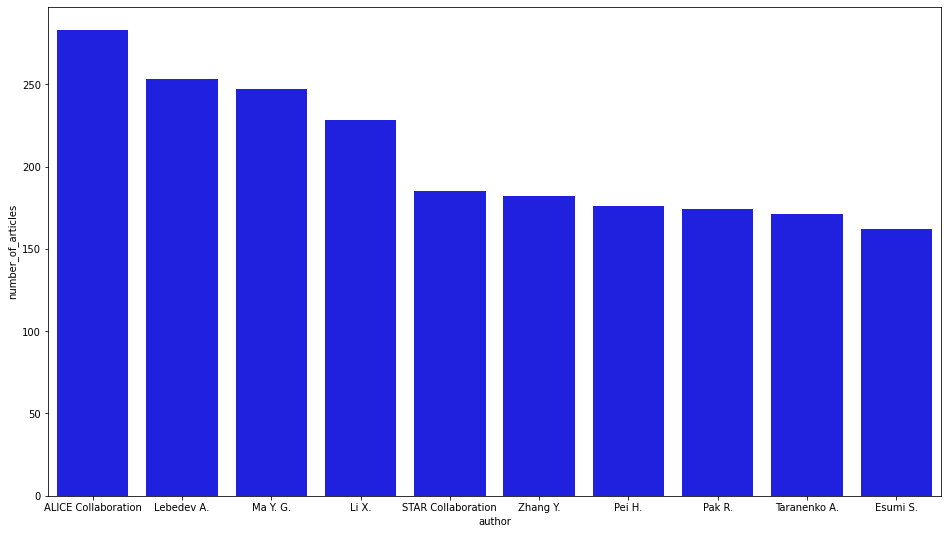

In [16]:
data = read_query("""
MATCH (a:Author)
RETURN a.name as author, size((a)-[:WROTE]->()) as number_of_articles
ORDER BY number_of_articles DESC LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="number_of_articles", data=data, color="blue")

I wasn't aware of this before, but it looks like that a collaboration like ALICE or STAR can be an author of an article. Let's explore the collaborations a bit more and take a look at the most active collaborations overall.

[Text(0, 0, 'ALICE Collaboration'),
 Text(1, 0, 'STAR Collaboration'),
 Text(2, 0, 'CMS Collaboration'),
 Text(3, 0, 'PHENIX Collaboration'),
 Text(4, 0, 'ATLAS Collaboration'),
 Text(5, 0, 'Collaboration the CLAS'),
 Text(6, 0, 'NA49 Collaboration'),
 Text(7, 0, 'WA98 Collaboration'),
 Text(8, 0, 'CLAS Collaboration'),
 Text(9, 0, 'The STAR Collaboration')]

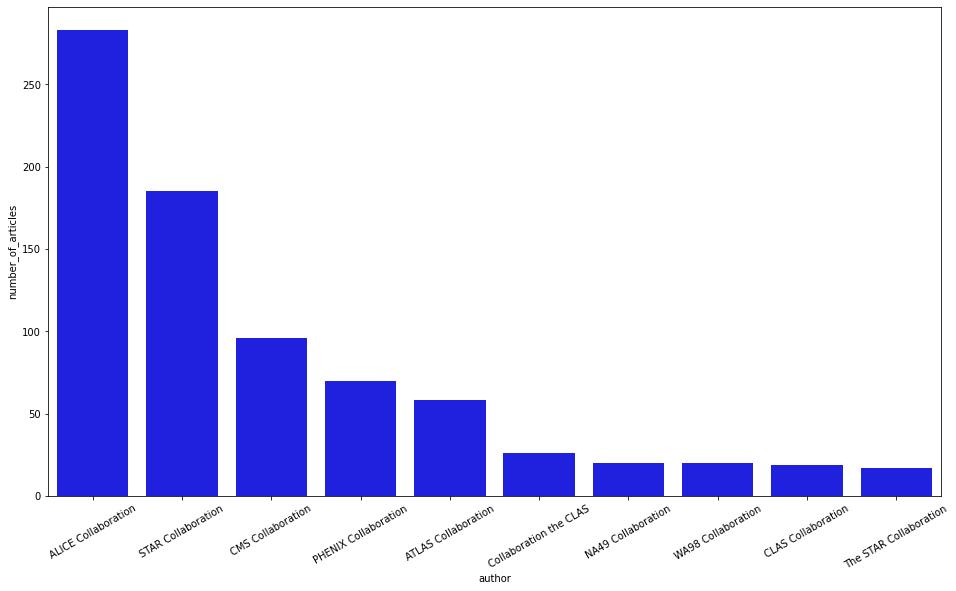

In [17]:
data = read_query("""
MATCH (a:Author)
WHERE a.name contains "Collaboration"
RETURN a.name as author,
       size((a)-[:WROTE]->()) as number_of_articles
ORDER BY number_of_articles
DESC LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="number_of_articles", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


We have already known that ALICE and STAR collaborations are the most active, but there are many more collaborations in the nuclear experiment category. Unfortunately, the data appears dirty, as there are two STAR collaboration variations and two CLAS collaboration variations. We'll do some data cleaning of the Author entities before we continue with the graph exploration analysis.

Data cleaning is the most fun part of any analysis. Well, not really, but it is a vital part of the research if we want to rely on the data. We'll introduce a secondary label for all collaboration nodes. Again, we will define a unique constraint for optimization and indexing.

In [18]:
with driver.session() as session:
    session.run('CREATE CONSTRAINT collaboration IF NOT EXISTS ON (c:Collaboration) ASSERT c.id IS UNIQUE;')

Let's take a look at the potential candidates that could be merged into a single entity. We will remove stop words from the author's name like "the", "collaboration", "for" and examine how well does this simple technique work.

In [19]:
read_query("""
WITH ["The","the","Collaboration", "collaboration", "for", "For", "\n","on behalf of","By "] as remove_words
MATCH (a:Author)
WHERE a.name contains "ollaboration"
WITH trim(reduce(v = a.name, word in remove_words | apoc.text.replace(v, word, ' '))) as author,
       collect(a.name) as nodes
WHERE size(nodes) > 1
RETURN author, nodes
ORDER BY author
LIMIT 10
""")

,author,nodes
0,9405,"[9405 collaboration, collaboration the 9405]"
1,A1,"[A1 Collaboration, Collaboration A1, Collabora..."
2,AGATA,"[Collaboration The AGATA, collaboration the AG..."
3,ALADIN,"[Collaboration ALADIN, Collaboration the ALADI..."
4,ALADIN2000,"[Collaboration ALADIN2000, The ALADIN2000 Coll..."
5,ALICE,"[ALICE Collaboration, ALICE collaboration, Col..."
6,ATLAS,"[ATLAS Collaboration, Collaboration ATLAS, The..."
7,Adamczewski-Musch J. HADES,"[Adamczewski-Musch J. HADES\n collaboration,..."
8,Adamczyk L. STAR,"[Adamczyk L. STAR\n Collaboration, Adamczyk ..."
9,Adhikari K. P. CLAS,[Adhikari K. P. for the CLAS\n collaboration...


It appears that this simple technique found many candidates to be merged. It also found examples where both an author and a collaboration can be mentioned as a single author. An example would be Adhikari K. P. for the CLAS Collaboration. We will first merge these candidates as presented in the previous query and go from there.

In [20]:
read_query("""
WITH ["The","the","Collaboration", "collaboration", "for", "For", "\n","on behalf of","By "] as remove_words
MATCH (a:Author)
WHERE (a.name contains "ollaboration" OR a.name IN ["INDRA","H1"]) AND NOT a.name CONTAINS "ollaborations" 
WITH trim(reduce(v = a.name, word in remove_words | apoc.text.replace(v, word, ' '))) as collab,
       collect(a) as nodes
CALL apoc.refactor.mergeNodes(nodes) YIELD node
SET node.name = collab, node:Collaboration
RETURN distinct 'done' as result
""")

,result
0,done


Next, we can decouple the entities where both the author and the collaboration are present as a single entity. We will start with a simple assumption that the last word in the author's name represents the collaboration. We will compare the last word of the author's name with the existing collaborations in our graph. If the last word matches an existing collaboration, we will decouple the single author node into collaboration and author nodes.

In [21]:
read_query("""
MATCH (c:Collaboration)
WHERE size(split(c.name,' ')) > 1
WITH c, split(c.name,' ')[-1] as collab
MATCH (c1:Collaboration{name:collab})
RETURN trim(replace(c.name, collab, '')) as author, c1.name as collab
LIMIT 10
""")

,author,collab
0,Ulery Jason Glyndwr,STAR
1,Peressounko D.,PHENIX
2,Denizli H.,CLAS
3,Mueller J.,CLAS
4,al. S. Dytman et,CLAS
5,Sharma Monika,STAR
6,Dogra Sunil,STAR
7,Gupta Neeraj,STAR
8,Steinberg P.,ATLAS
9,Hanks Ali,PHENIX


This query only looked at intermediate results but did not store the decoupled relationships. The decoupling results are satisfactory, so we will go ahead and save the decoupled relationships back to the graph.

In [22]:
read_query("""
MATCH (c:Collaboration)
WHERE size(split(c.name,' ')) > 1
WITH c, split(c.name,' ')[-1] as collab
MATCH (new_colab:Collaboration{name:collab})
WITH c,new_colab, trim(replace(c.name, collab, '')) as author
MATCH (c)-[:WROTE]->(article:Article)
MERGE (new_author:Author{name:author})
MERGE (new_colab)-[:WROTE]->(article)
MERGE (new_author)-[:WROTE]->(article)
WITH distinct c
DETACH DELETE c
RETURN distinct 'done' as result
""")

,result
0,done


Let's examine the potential collaboration candidates that our previous decoupling technique missed.

In [23]:
read_query("""
MATCH (c:Collaboration)
WHERE size(split(c.name,' ')) > 1
RETURN c.name as author
LIMIT 6
""")

,author
0,Junkersfeld J. CB-ELSA
1,Curceanu Catalina AMADEUS
2,van Pee H. CB-ELSA
3,Bartholomy O. CB-ELSA
4,Crede V. CB-ELSA
5,Lukasik J. ALADIN'2000


Some of the collaboration names are longer than just a single word, like  "Jefferson Lab Hall A" and we have missed those. Some of the others weren't tagged as collaborations before, because it is not explicitly tagged as collaboration in text. With a bit of manual work, I have listed a bunch of other collaborations that need to be decoupled as well.

In [24]:
read_query("""
UNWIND ["Jefferson Lab Hall A", "NA61/SHINE", "Crystal Ball at MAMI", "WA98", "A2 at MAMI",
        "JETSCAPE", "DLS", "WASA-at-COSY", "CERES/NA45", "ALADIN'2000",
        "AMADEUS", "CB-ELSA", "GRAAL", "KEK-PS E559","CELSIUS-WASA",
        "RHIC Spin", "EIC", "LSSS", "COSY-11", "PAX", "Hall A", "LPC-CHARISSA-DEMON",
        "Crystal Ball at MAMI", "KLOE-2", "Graal", "HAL QCD", "MAJORANA.","Daya Bay",
        "UConn-Yale-TUNL-Weizmann-PTB-UCL", "KamLAND-Zen", "COMPASS", "PREX", "ALICE HLT"] as collab
MATCH (c:Collaboration)
WHERE size(split(c.name,' ')) > 1 AND NOT c.name in ["Jefferson Lab Hall A", "Hall A DVCS", "Hall A", "HAL QCD"] AND
      c.name contains collab
WITH c, trim(replace(c.name,collab,'')) as author, collab
MERGE (new_author:Author{name:author})
MERGE (new_collab:Author{name:collab})
SET new_collab:Collaboration
WITH c, new_author, new_collab
MATCH (c)-[:WROTE]->(article:Article)
MERGE (new_author)-[:WROTE]->(article)
MERGE (new_collab)-[:WROTE]->(article)
WITH distinct c
DETACH delete c
RETURN distinct 'done' as result
""")

,result
0,done


Last, but not least, the  "Jefferson Lab Hall A" shows up also as "Hall A DVCS" and "Hall A", so we'll merge them into a single entity as well.

In [25]:
read_query("""
MATCH (c:Collaboration)
WHERE c.name contains "Hall A"
WITH c ORDER BY c.name
WITH collect(c) as nodes
CALL apoc.refactor.mergeNodes(nodes, {properties: {name:'overwrite'}}) YIELD node
RETURN distinct 'done' as result
""")

,result
0,done


We have cleaned the entities where a single collaboration or a pair of collaboration and an author appeared. The dataset also has entities where two or more collaborations can occur along with an author. Because this is not a data cleaning workshop, we'll skip cleaning this data.

In [26]:
read_query("""
MATCH (a:Author)
WHERE a.name CONTAINS "Collaborations"
RETURN a.name as author limit 5
""")

,author
0,Acha A. HKS - JLab\n E05-115 and E01-001 - C...
1,Achenbach P. HKS - JLab\n E05-115 and E01-00...
2,Adhikari K. P. The CLAS and Hall-A Collaborat...
3,Aghasyan M. The CLAS and Hall-A Collaborations
4,"Aguar-Bartolomé P. The Crystal Ball at MAMI, ..."


# Exploratory graph analysis

Finally, we can start our exploratory graph analysis. We will begin by taking a look at the number of articles written by publication year.

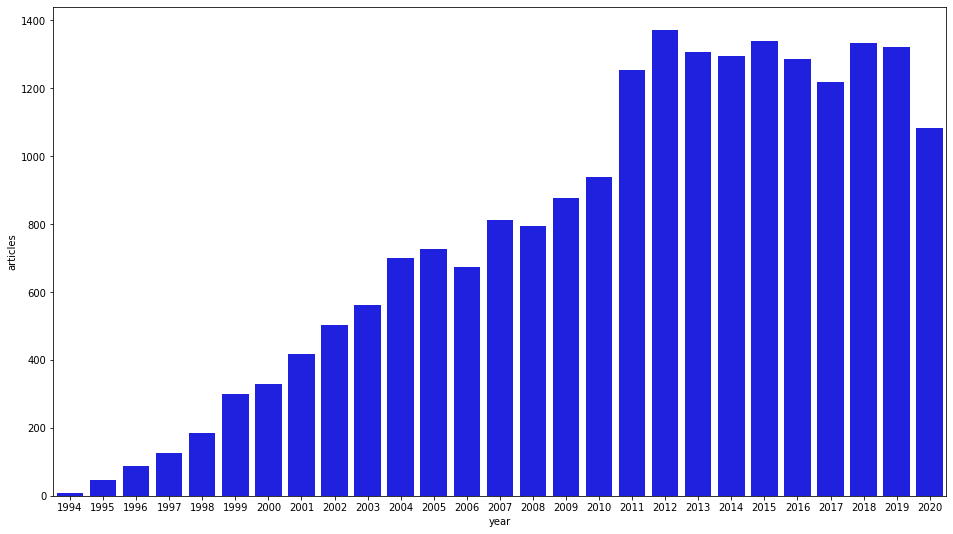

In [27]:
data = read_query("""
MATCH (a:Article)
RETURN a.date.year as year, count(*) as articles
ORDER BY year
""")
fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="year", y="articles", data=data, color="blue")

The nuclear experiment category on ArXiv was created in 1994. Since then, it has steadily risen in popularity until the year 2011, where the number of articles written per year has plateaued for the last decade.

We will again take a look at the most active authors but disregard any collaborations this time.

[Text(0, 0, 'Lebedev A.'),
 Text(1, 0, 'Ma Y. G.'),
 Text(2, 0, 'Li X.'),
 Text(3, 0, 'Zhang Y.'),
 Text(4, 0, 'Pei H.'),
 Text(5, 0, 'Taranenko A.'),
 Text(6, 0, 'Pak R.'),
 Text(7, 0, 'Xie W.'),
 Text(8, 0, 'Esumi S.'),
 Text(9, 0, 'Lacey R.')]

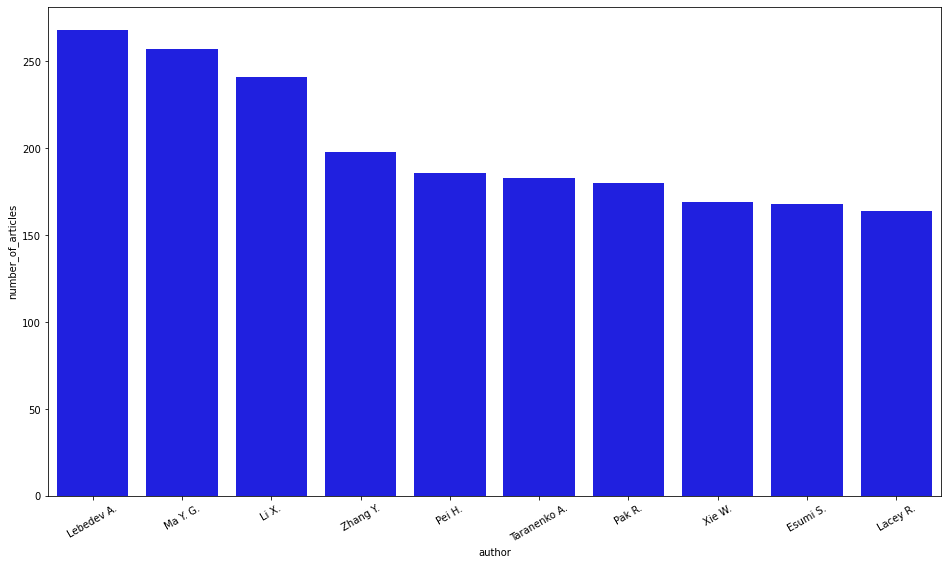

In [27]:
data = read_query("""
MATCH (a:Author)
WHERE NOT a:Collaboration
RETURN a.name as author,
       size((a)-[:WROTE]->()) as number_of_articles
ORDER BY number_of_articles DESC
LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="number_of_articles", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Lebedev A. stays as the most active author, while Ma. Y. G. and Li X. follow in the second and third place. Another interesting statistic to look at is who has collaborated with most of the other authors.

[Text(0, 0, 'Wang Y.'),
 Text(1, 0, 'Zhang Y.'),
 Text(2, 0, 'Li Y.'),
 Text(3, 0, 'Dutta D.'),
 Text(4, 0, 'Zhang C.'),
 Text(5, 0, 'Li X.'),
 Text(6, 0, 'Weber M.'),
 Text(7, 0, 'Wang Z.'),
 Text(8, 0, 'Liu H.'),
 Text(9, 0, 'Huang J.')]

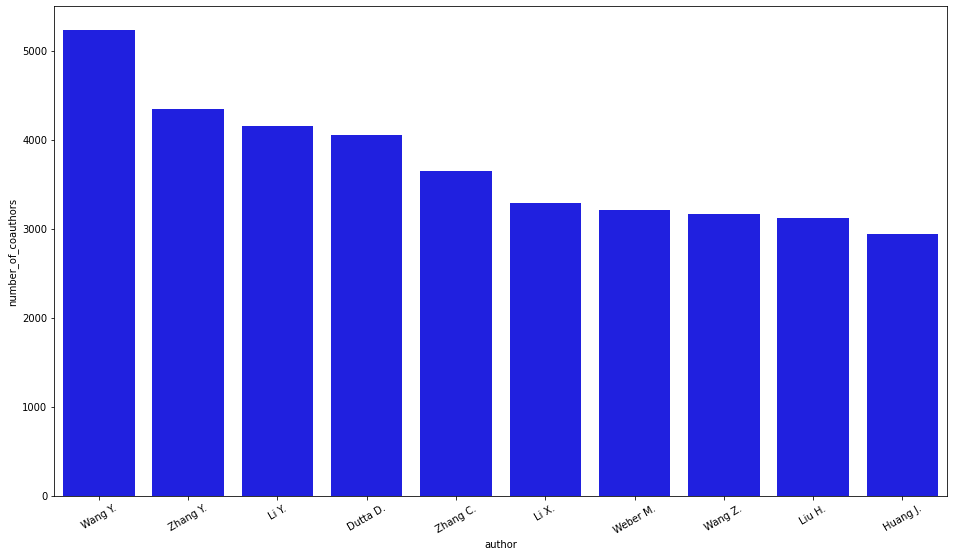

In [32]:
data = read_query("""
MATCH (a:Author)-[:WROTE]->()<-[:WROTE]-(other)
WHERE NOT a:Collaboration AND NOT other:Collaboration
RETURN a.name as author,
       count(distinct other) as number_of_coauthors
ORDER BY number_of_coauthors DESC
LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="number_of_coauthors", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Wang Y. has collaborated with more than 5000 other authors. When I first observed this data, I taught for sure there was some error in the data. It turns out this is correct. The only explanation is that there are articles where many scientists collaborated on a paper. We'll take a look at articles with the highest count of authors.

[Text(0, 0, '2008.06647'),
 Text(1, 0, '1902.05599'),
 Text(2, 0, '1810.07655'),
 Text(3, 0, '1809.01404'),
 Text(4, 0, '1610.02149'),
 Text(5, 0, '1606.01118'),
 Text(6, 0, '1808.08917'),
 Text(7, 0, '1902.01211'),
 Text(8, 0, '1004.2377'),
 Text(9, 0, '1006.1961')]

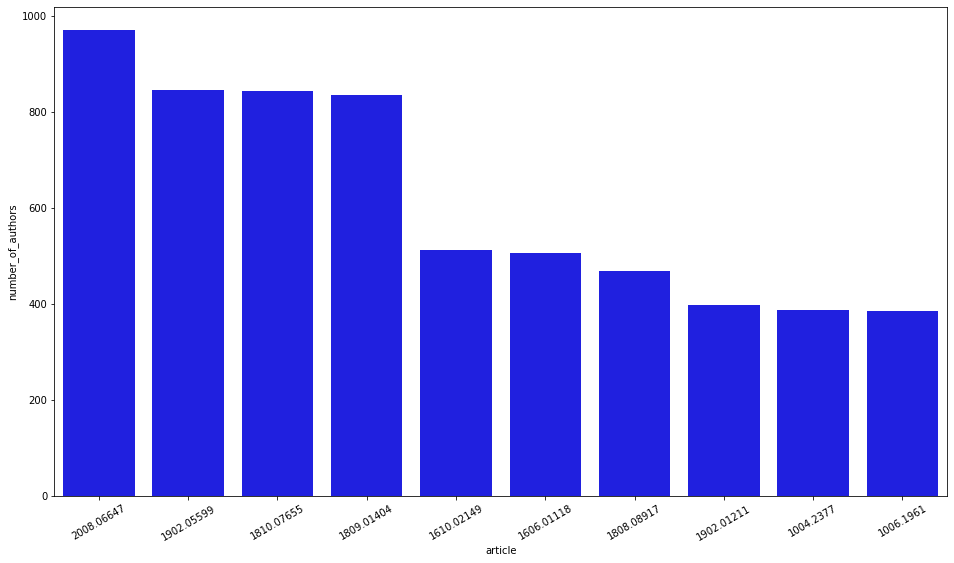

In [31]:
data = read_query("""
MATCH (a:Author{name:"Wang Y."})-[:WROTE]->(article)
RETURN article.id as article,
       size((article)<-[:WROTE]-()) as number_of_authors
ORDER BY number_of_authors DESC
LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="article", y="number_of_authors", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

There are four articles where more than 800 researchers have collaborated. I've also checked the ArXiv page to verify this data, and it turns out to be valid. I can only applaud the coordinators of these articles, where they could finish a paper with almost a thousand collaborators.

Next, we'll take a look at pairs of researchers that have collaborated the most.

[Text(0, 0, 'Lebedev A. with Li X.'),
 Text(1, 0, 'Lebedev A. with Pei H.'),
 Text(2, 0, 'Li X. with Pei H.'),
 Text(3, 0, 'Lebedev A. with Xie W.'),
 Text(4, 0, 'Pak R. with Lebedev A.'),
 Text(5, 0, 'Li X. with Xie W.'),
 Text(6, 0, 'Lebedev A. with Esumi S.'),
 Text(7, 0, 'Pak R. with Li X.'),
 Text(8, 0, 'Xie W. with Pei H.'),
 Text(9, 0, 'Lebedev A. with Jia J.')]

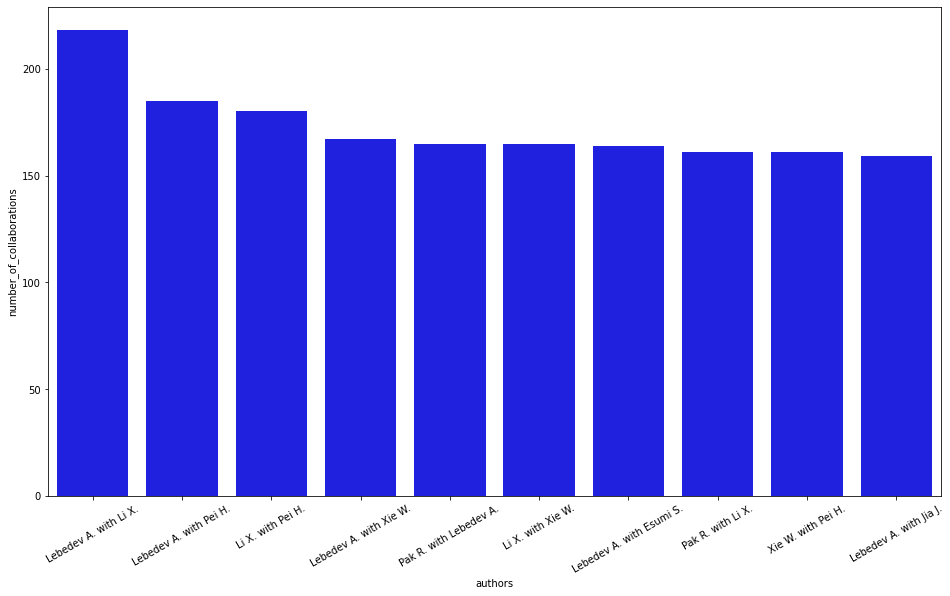

In [34]:
data = read_query("""
MATCH (a:Author)-[:WROTE]->()<-[:WROTE]-(other)
WHERE id(a) < id(other) AND NOT a:Collaboration AND NOT other:Collaboration
RETURN a.name + ' with ' + other.name as authors,
       count(*) as number_of_collaborations
ORDER BY number_of_collaborations DESC
LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="authors", y="number_of_collaborations", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Lebedev A. has worked on more than 200 articles with Li X. and around 180 articles with Pei H. In the third place, we have Li X. and Pei H. We might assume that Lebedev A., Li X., and Pei H. are the powerhouse in the Nuclear Experiments category.

We can also examine the most active authors by publication year for the last decade.

In [28]:
read_query("""
MATCH (a:Author)-[:WROTE]->(article:Article)
WHERE NOT a:Collaboration AND article.date.year > 2010
WITH article.date.year as year, a.name as author, count(*) as count
ORDER BY count DESC 
RETURN year,
       collect(author)[..3] as most_active_authors
ORDER BY year 
""")

,year,most_active_authors
0,1994,"[Igo G., Matis H. S., Barabanov A. L.]"
1,1995,"[Cizewski J. A., Bowman D. R., Horn D.]"
2,1996,"[Oberhummer H., Mohr P., Beer H.]"
3,1997,"[VanDalen G. J., Wadia N., Geiger Klaus]"
4,1998,"[Oelert W., Balewski J. T., Kilian K.]"
5,1999,"[Melby E., Schiller A., Rekstad J.]"
6,2000,"[Wagner A., Strzalkowski A., Thomas A. W.]"
7,2001,"[Drenska S. B., Raychev P. P., Roussev R. P.]"
8,2002,"[Adcox K., Bahcall John N., Hudan S.]"
9,2003,"[Adams J., Krusche B., Adler S. S.]"


# Co-authorship network analysis
If we remember, the idea for this article came out of necessity to find a potential collaborator for my basement project. After some basic graph explorations, it seems that one can't do nuclear experiments on its own but has to join a collaboration or find a study to participate with 800 other scientists.
We will explore the co-authorship network with the help of the Neo4j Graph Data Science library. If you need a quick refresher on how does the GDS library work, I would suggest the Introduction to graph algorithm course.
An important thing to note is that our network analysis of the co-authorship network does not consider how influential the papers the authors have written are. It can be seen as more of a social network analysis, where we assume that if two authors collaborated on an article, they know each other. This way, I can find authors with lots of networking influence to collaborate on my project and introduce me to various people and organizations.
We will use the Cypher projection feature to project the co-authorship network. The co-authorship relationship between the authors does not exist in our stored graph, so it could be said that we will be projecting a virtual network where we reduce the 2-hop relationship to a direct relationship without having to save the direct relationship in Neo4j. We will also disregard nodes with the Collaboration label in our analysis.

In [37]:
read_query("""
CALL gds.graph.create.cypher('coauthorship-network',
  'MATCH (a:Author) WHERE NOT a:Collaboration RETURN id(a) as id',
  'MATCH (s:Author)-[:WROTE]->()<-[:WROTE]-(t:Author)
   WHERE NOT s:Collaboration AND NOT t:Collaboration
   RETURN id(s) as source, id(t) as target, count(*) as weight')
""")

,nodeQuery,relationshipQuery,graphName,nodeCount,relationshipCount,createMillis
0,MATCH (a:Author) WHERE NOT a:Collaboration RET...,MATCH (s:Author)-[:WROTE]->()<-[:WROTE]-(t:Aut...,coauthorship-network,55134,9932908,29973


We will begin with the Weakly Connected Components algorithms. It is used to find disconnected components or islands within the graph.

In [38]:
read_query("""
CALL gds.wcc.write('coauthorship-network', {writeProperty:'wcc_coauthorship'})
YIELD componentCount, componentDistribution
""")

,componentCount,componentDistribution
0,2281,"{'p99': 35, 'min': 1, 'max': 46666, 'mean': 24..."


There is a total of 2281 components in our network. More than half of them consist of a single node, which indicates that the specific author has no collaborations. As with most real-world networks, we have a single super component that contains 85% of all nodes and then many smaller ones.
Next, we will execute the weighted variant of the PageRank algorithm to find the authors with the highest networking potential. We expect that authors who collaborated with other influential networking authors will rank the highest. We will store the results to Neo4j with the write mode of the algorithm.

In [41]:
read_query("""
CALL gds.pageRank.write('coauthorship-network', 
  {writeProperty:'pagerank_coauthorship', maxIterations:20, relationshipWeightProperty:'weight'})
YIELD centralityDistribution
""")

,centralityDistribution
0,"{'p1': 0.14999961853027344, 'max': 16.52624416..."


Let's examine the authors with the highest networking potential.

[Text(0, 0, 'Zhang Y.'),
 Text(1, 0, 'Lebedev A.'),
 Text(2, 0, 'Li X.'),
 Text(3, 0, 'Wang Y.'),
 Text(4, 0, 'Li Bao-An'),
 Text(5, 0, 'Li Y.'),
 Text(6, 0, 'Ma Y. G.'),
 Text(7, 0, 'Zhang J.'),
 Text(8, 0, 'Dutta D.'),
 Text(9, 0, 'Ye Z.')]

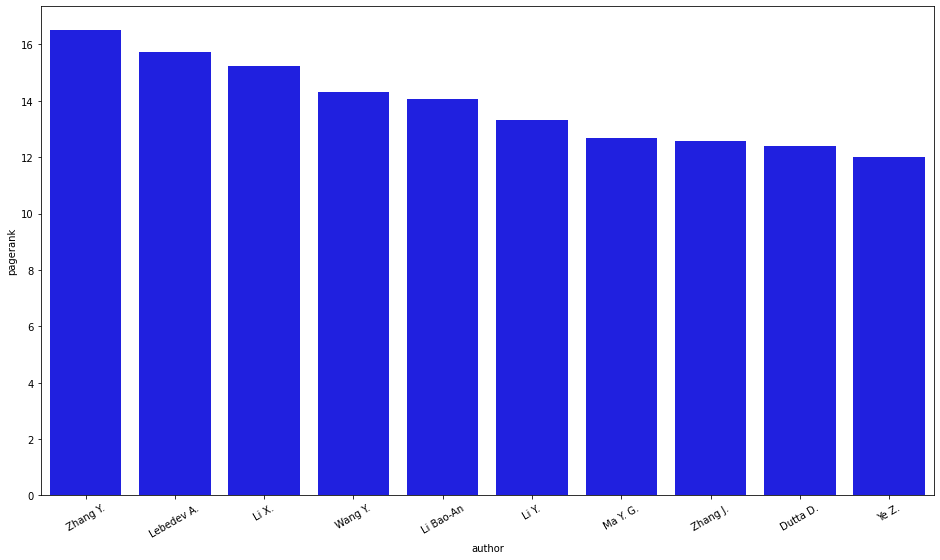

In [42]:
data = read_query("""
MATCH (a:Author)
WHERE NOT a:Collaboration
RETURN a.name as author, a.pagerank_coauthorship as pagerank
ORDER BY pagerank DESC
LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="pagerank", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

It seems that Zhang Y., Lebedev A., and Li X. have the highest networking potential. If someone can get me their contact, I would appreciate it.
We can also examine authors with the highest PageRank score grouped by connected component for the five largest components.

In [40]:
read_query("""
MATCH (a:Author)
WHERE NOT a:Collaboration
WITH a.wcc_coauthorship as componentId, a.pagerank_coauthorship as pagerank, a
ORDER BY pagerank DESC
RETURN componentId, count(*) as countOfMembers, collect(a.name)[..3] as mostInfluentialMembers
ORDER BY countOfMembers DESC
LIMIT 5
""")

,componentId,countOfMembers,mostInfluentialMembers
0,0,46666,"[Wang Y., Zhang Y., Dutta D.]"
1,19971,200,[Pomerantz I. The CLAS and Hall-A Collaborati...
2,14137,177,"[Strakovsky Igor GWU, Bellwied Rene Houston ..."
3,25481,133,[Taniya N. HKS - JLab\n E05-115 and E01-001 ...
4,17156,132,"[Nakamura S. N. HKS, Matsumura A. HKS, Okaya..."


More than anything, the WCC results alert us about the authors' data we haven't cleaned. I assume the largest component, which consists of 46666 members, is the component with the cleaned author names. The second-largest component consists of authors, where that author appeared along with two collaborations. Last, there are a couple of associations or organizations I have missed in my manual cleanup process.

We will also use the approximate Betweenness centrality to observe who has the most influence over the information flow in the co-authorship network.

[Text(0, 0, 'Zhang Y.'),
 Text(1, 0, 'Wang Y.'),
 Text(2, 0, 'Wang Meng'),
 Text(3, 0, 'Dutta D.'),
 Text(4, 0, 'Marciano W. J.'),
 Text(5, 0, 'Choi Seonho'),
 Text(6, 0, 'Li Y.'),
 Text(7, 0, 'Wang Z.'),
 Text(8, 0, 'Weber M.'),
 Text(9, 0, 'Deng Zhi')]

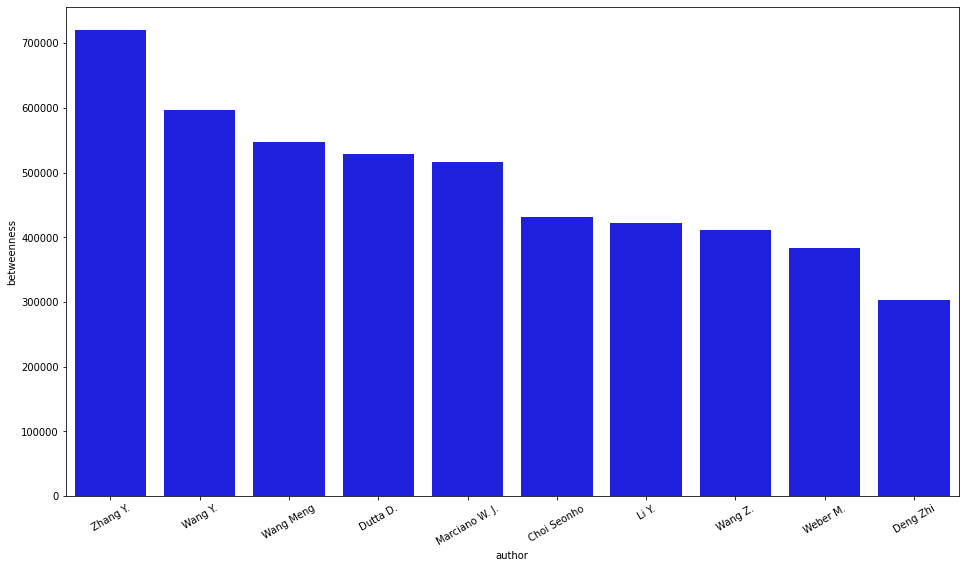

In [39]:
data = read_query("""
CALL gds.betweenness.stream('coauthorship-network', 
  {samplingSize:1000})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name as author, score as betweenness
ORDER BY betweenness DESC LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="betweenness", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [43]:
read_query("""
CALL gds.graph.drop('coauthorship-network')
""")

,graphName,database,memoryUsage,sizeInBytes,nodeProjection,relationshipProjection,nodeQuery,relationshipQuery,nodeCount,relationshipCount,density,creationTime,modificationTime,schema
0,coauthorship-network,neo4j,96 MiB,100867472,None,None,MATCH (a:Author) WHERE NOT a:Collaboration RET...,MATCH (s:Author)-[:WROTE]->()<-[:WROTE]-(t:Aut...,55134,9932908,0.003268,2020-11-25T21:44:31.397368000+01:00,2020-11-25T21:45:01.349219000+01:00,{'relationships': {'__ALL__': {'weight': 'Floa...


# Citation network

The time has come to enrich our graph with external data. The internal citation network between ArXiv articles is available on GitHub. You will need to download the internal references file. If you look closely at the Kaggle ArXiv dataset footnotes, this is the same tool they used to scrape the ArXiv articles and authors. It makes sense that the author's information is dirty as it was scraped from the PDFs.

Citations dataset is available on https://github.com/mattbierbaum/arxiv-public-datasets/releases.

After we have downloaded the internal references dataset, we can import it using the following Python script.

In [45]:
with open('internal-references-pdftotext.json') as citation_file:
    citations = json.load(citation_file)

In [46]:
import_citations_query = """

UNWIND $data as row
MATCH (source:Article{id:row.source})
WITH source, row.cites as cites
UNWIND cites as cite
MATCH (target:Article{id:cite})
MERGE (source)-[:CITES]->(target)
RETURN distinct 'done' as result
"""

In [47]:
articles_id = articles_df['id'].to_list()
citations_params = []
session = driver.session()

for article in citations:
    if not article in articles_id:
        continue
    
    citations_params.append({'source':article, 'cites': citations[article]})    
    
    if (len(citations_params) % 1000) == 0:
        session.run(import_citations_query, {'data': citations_params})
        citations_params = []

session.run(import_citations_query, {'data': citations_params})
session.close()        

Let's first count the number of internal citations we have imported.

In [48]:
read_query("""
MATCH ()-[r:CITES]->() 
RETURN count(*) as count_of_citations
""")

,count_of_citations
0,56172


There are 56172 citations between 20874 articles. The dataset was compiled on 30th April 2019, so we don't have any citations after that date. We can now look at the most cited articles within our network.

In [49]:
read_query("""
MATCH (a:Article)
RETURN a.title as title,
       size((a)<-[:CITES]-()) as citations
ORDER BY citations DESC LIMIT 10

""")

,title,citations
0,Formation of dense partonic matter in relativi...,256
1,Experimental and Theoretical Challenges in the...,247
2,Glauber Modeling in High Energy Nuclear Collis...,222
3,Hydrodynamic description of ultrarelativistic ...,220
4,Quark Gluon Plasma an Color Glass Condensate a...,202
5,Collective phenomena in non-central nuclear co...,201
6,The PHOBOS Perspective on Discoveries at RHIC,194
7,Performance of the ALICE Experiment at the CER...,177
8,Observation and studies of jet quenching in Pb...,169
9,Long-range angular correlations on the near an...,156


To my uneducated eye, it seems that the most cited articles talk about nuclear collisions. Next, we will calculate the ArticleRank score for each article in the citation network. ArticleRank is a variation of the PageRank algorithm. Find more details here.

First, we will project the citation network with the Native projection feature.

In [50]:
read_query("""
CALL gds.graph.create('citation-network', 'Article', 'CITES')
""")

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,createMillis
0,"{'Article': {'properties': {}, 'label': 'Artic...","{'CITES': {'orientation': 'NATURAL', 'aggregat...",citation-network,20874,56172,153


Now we can execute the ArticleRank and store the results back to Neo4j.

In [51]:
read_query("""
CALL gds.alpha.articleRank.write('citation-network', 
  {writeProperty:'articlerank_citation'})
""")

,nodes,iterations,createMillis,computeMillis,writeMillis,dampingFactor,writeProperty
0,0,0,0,149,260,0.0,articlerank_citation


Let's examine the ArticleRank algorithm results.

In [52]:
read_query("""
MATCH (a:Article)
RETURN a.title as title, a.articlerank_citation as articlerank
ORDER BY articlerank 
DESC LIMIT 10
""")

,title,articlerank
0,Hydrodynamic description of ultrarelativistic ...,7.417196
1,Collective phenomena in non-central nuclear co...,5.009129
2,Eccentricity fluctuations and its possible eff...,4.826668
3,Glauber Modeling in High Energy Nuclear Collis...,3.886324
4,The Color Glass Condensate and High Energy Sca...,3.617933
5,Reconstructing azimuthal distributions in nucl...,3.539150
6,The PHOBOS Glauber Monte Carlo,3.293096
7,Formation of dense partonic matter in relativi...,3.259142
8,An Experimental Exploration of the QCD Phase D...,3.168804
9,Experimental and Theoretical Challenges in the...,3.001694


We can observe that the ranking is a bit different as with the direct count of citation rank. The ranking difference is due to taking into account the number of citations as well as the importance of the citing papers.

We can also look at the author with the highest sum of ArticleRank of his articles.

[Text(0, 0, 'Lebedev A.'),
 Text(1, 0, 'Li X.'),
 Text(2, 0, 'Ma Y. G.'),
 Text(3, 0, 'Pei H.'),
 Text(4, 0, 'Zhang Y.'),
 Text(5, 0, 'Xie W.'),
 Text(6, 0, 'Pak R.'),
 Text(7, 0, 'Taranenko A.'),
 Text(8, 0, 'Liu H.'),
 Text(9, 0, 'Masui H.')]

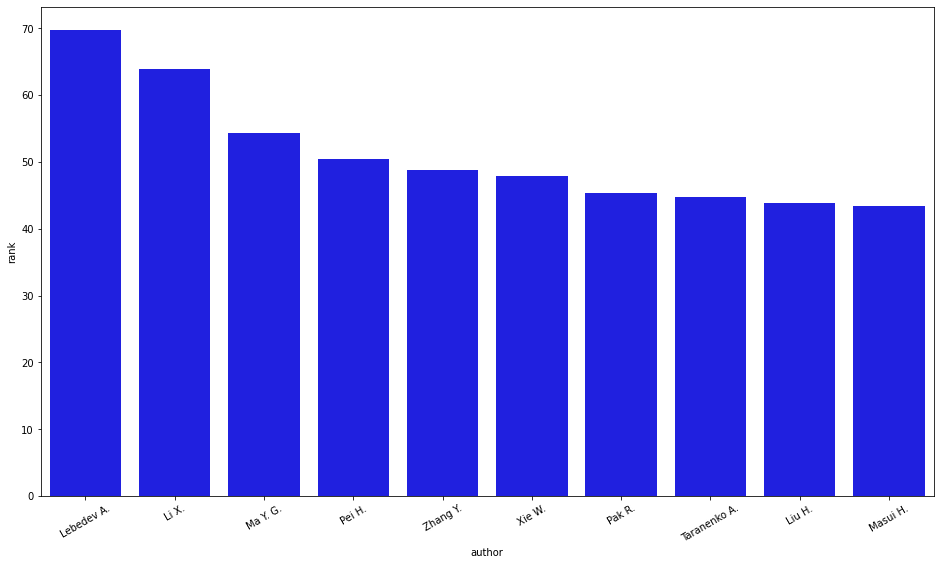

In [52]:
data = read_query("""
MATCH (a:Author)-[:WROTE]->(article:Article)
WHERE NOT a:Collaboration
RETURN a.name as author, sum(article.articlerank_citation) as rank
ORDER BY rank
DESC LIMIT 10
""")

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(x="author", y="rank", data=data, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

The usual suspects come out on top like Lebedev A. and Li X. Another option we have is to look at the most influential articles by the year of publication.

In [54]:
read_query("""
MATCH (a:Article)
WHERE a.articlerank_citation > 0.151 AND a.date.year > 2010
WITH a, a.date.year as year, a.pagerank_citation as pagerank
ORDER BY pagerank DESC
RETURN year, collect(a.id)[..3] as most_influential_articles
ORDER BY year
""")

,year,most_influential_articles
0,2011,"[1101.0710, 1101.0988, 1101.1257]"
1,2012,"[1201.0373, 1201.0392, 1201.0699]"
2,2013,"[1301.0099, 1301.0165, 1301.0324]"
3,2014,"[1403.4257, 1403.4455, 1403.4668]"
4,2015,"[1511.02834, 1511.02957, 1511.03338]"
5,2016,"[1601.00040, 1601.00079, 1601.00188]"
6,2017,"[1709.05325, 1709.05618, 1709.05649]"
7,2018,"[1801.01124, 1801.01213, 1801.01277]"
8,2019,"[1901.01319, 1901.04378, 1901.04482]"


In [55]:
read_query("""
CALL gds.graph.drop('citation-network')
""")

,graphName,database,memoryUsage,sizeInBytes,nodeProjection,relationshipProjection,nodeQuery,relationshipQuery,nodeCount,relationshipCount,density,creationTime,modificationTime,schema
0,citation-network,neo4j,6200 KiB,6348824,"{'Article': {'properties': {}, 'label': 'Artic...","{'CITES': {'orientation': 'NATURAL', 'aggregat...",None,None,20874,56172,0.000129,2020-11-25T22:20:31.402535000+01:00,2020-11-25T22:20:31.559302000+01:00,"{'relationships': {'CITES': {}}, 'nodes': {'Ar..."


# Prepare an article search engine
We have analyzed both the co-authorship and the citation network. I have a good idea who I need to contact for my basement nuclear reactor. Let's now create a search engine for the articles, where you get the most relevant articles based on the keyword you provide. We will use the Fulltext search index, which is available in Neo4j. I have written a detailed blog post explaining the FTS functionalities in Neo4j.
First, we have to store the publication year of the article as a string property to be able to load it in the Full-Text Search index.

In [55]:
read_query("""
MATCH (a:Article)
SET a.year = toString(a.date.year)
""")

""


Now we can create the Full-Text Search index, where we index the title, abstract, and year property of articles.

In [56]:
read_query("""
CALL db.index.fulltext.createNodeIndex("titlesAndAbstracts",["Article"],["title", "abstract", "year"])
""")

""


We can take execute a sample FTS query looking for articles containing LHC keyword in the text.

In [57]:
read_query("""
CALL db.index.fulltext.queryNodes("titlesAndAbstracts", "LHC") YIELD node, score
RETURN node.title, score
LIMIT 10
""")

,node.title,score
0,Physics perspectives with AFTER@LHC (A Fixed T...,4.070171
1,Quarkonium-photoproduction prospects at a fixe...,3.962277
2,Charmonium production at the LHC,3.870992
3,Prospectives for A Fixed-Target ExpeRiment at ...,3.811666
4,Double-quarkonium production at a fixed-target...,3.724421
5,Spin physics and TMD studies at A Fixed-Target...,3.682571
6,Physics case for a polarised target for AFTER@LHC,3.660166
7,Studies of Transverse-Momentum-Dependent distr...,3.636151
8,Heavy-ion results from the LHC,3.626198
9,LHC Results on Charmonium in Heavy Ions,3.606902


We can upgrade our query and search for articles containing LHC keyword that were published in 2015. We can also combine the Lucene score with the ArticleRank score to return more influential papers.

In [59]:
read_query("""
CALL db.index.fulltext.queryNodes("titlesAndAbstracts", "LHC AND year:2015") YIELD node, score
RETURN node.title as title, node.id as id, score * node.articlerank_citation as combined_score
ORDER BY combined_score DESC
LIMIT 5
""")

,title,id,combined_score
0,The Color Glass Condensate and High Energy Sca...,hep-ph/0303204,3.409086
1,Observation of long-range near-side angular co...,1210.5482,3.318393
2,Performance of the ALICE Experiment at the CER...,1402.4476,3.286480
3,Photon Physics in Heavy Ion Collisions at the LHC,hep-ph/0311131,3.113061
4,Observation and studies of jet quenching in Pb...,1102.1957,2.806736
5,Hard scattering cross sections at LHC in the G...,nucl-ex/0302016,2.617114
6,Heavy-flavour and quarkonium production in the...,1506.03981,2.602295
7,Proton-Nucleus Collisions at the LHC: Scientif...,1105.3919,2.541617
8,Heavy Ion Collisions at the LHC - Last Call fo...,0711.0974,2.486684
9,Jet size dependence of single jet suppression ...,1208.1967,2.430719


Another cool thing we can do with Fulltext search is to introduce the time-decay scoring. I've learned this trick from Christophe Willemsen.

In [57]:
read_query("""
WITH apoc.text.join([x in range(0,10) | 
"year:" + toString((date().year - x)) + "^" +   
  toString(10-x)]," ") as time_decay
CALL db.index.fulltext.queryNodes("titlesAndAbstracts", "LHC " + time_decay) YIELD node, score
RETURN node.title as title, node.id as id, score * node.articlerank_citation as combined_score
ORDER BY combined_score DESC
LIMIT 5
""")

,title,id,combined_score
0,Performance of the ALICE Experiment at the CER...,1402.4476,13.141213
1,Heavy-flavour and quarkonium production in the...,1506.03981,9.478550
2,Observation of long-range near-side angular co...,1210.5482,6.864690
3,Collective flow and viscosity in relativistic ...,1301.2826,6.646857
4,Observation and studies of jet quenching in Pb...,1102.1957,6.287071


# Develop an article recommendation engine
If we are already making an application on top of this dataset, we can also add a recommendation engine. We want to be able to recommend similar articles to the one we are currently reading. How do we go about that? We don't have any data yet in the graph that we could use to group similar articles together. Luckily, we can use many NLP tools to find similar papers given their title and abstract text. We will use the SciBert model to extract embeddings for each article and then use the kNN algorithm to find similar papers based on their embeddings.
First, we have to calculate the embeddings and store them back to Neo4j. We will use the transformers library to load the pre-trained SciBert model and calculate the embeddings based on the title and abstract of an article.

In [18]:
from transformers import *

tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased', model_max_length=512)
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')

In [19]:
store_embeddings_query = """
UNWIND $data as row
MATCH (a:Article{id:row.article_id})
SET a.embeddings = row.embeddings
"""

In [20]:
input_embeddings = []
session = driver.session()
for i, row in articles_df.iterrows():
    inputs = tokenizer(row['clean_title'] + ' ' + row['clean_abstracts'], return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    embeddings = outputs[1].detach().numpy().tolist()[0]
    input_embeddings.append({'embeddings':embeddings, 'article_id': row['id']})
    
    if len(input_embeddings) % 1000 == 0:
        session.run(store_embeddings_query, {'data':input_embeddings})
        input_embeddings = []
        
session.run(store_embeddings_query, {'data':input_embeddings})

This process took around an hour on my laptop. With the embeddings stored in Neo4j, we can go ahead infer the kNN similarity network using the new k-Nearest Neighbour algorithm available in the GDS. As always, we have to first project the in-memory graph.

In [23]:
read_query("""
CALL gds.graph.create('article_similarity','Article','*', {nodeProperties:['embeddings']})
""")

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,createMillis
0,{'Article': {'properties': {'embeddings': {'pr...,"{'__ALL__': {'orientation': 'NATURAL', 'aggreg...",article_similarity,20874,56172,1010


We want to be able to recommend at most ten similar articles, so we will choose the topK value of 10 in the configuration option for the kNN algorithm. We will store the results as SIMILAR relationships between articles, where the score property will indicate the cosine similarity between the embeddings of the two articles.

In [25]:
read_query("""
CALL gds.beta.knn.write('article_similarity', {nodeWeightProperty:'embeddings', 
writeProperty:'score', writeRelationshipType:'SIMILAR', topK:10})
""")

,createMillis,computeMillis,writeMillis,postProcessingMillis,nodesCompared,relationshipsWritten,similarityDistribution,configuration
0,1,10545,3791,-1,20874,208740,"{'p1': 0.8992156982421875, 'max': 1.0000038146...","{'topK': 10, 'maxIterations': 100, 'writeConcu..."


We can now observe the recommendations for a random article.

In [26]:
read_query("""
MATCH (a:Article{id:"1210.5482"})-[s:SIMILAR]->(similar)
RETURN a.title as original, similar.title as recommendation, s.score as score
ORDER BY score DESC
LIMIT 5
""")

,original,recommendation,score
0,Observation of long-range near-side angular co...,Evidence for collectivity in pp collisions at ...,0.985051
1,Observation of long-range near-side angular co...,Baryon and meson screening masses,0.981358
2,Observation of long-range near-side angular co...,High Precision Measurement of the Proton Elast...,0.981115
3,Observation of long-range near-side angular co...,Direct Observation of Proton-Neutron Short-Ran...,0.980855
4,Observation of long-range near-side angular co...,In-medium minijet dissipation in Au+Au collisi...,0.979592


And just like before, we can combine the similarity score and ArticleRank score to recommend more relevant articles.

In [96]:
read_query("""
MATCH (a:Article{id:"1210.5482"})-[s:SIMILAR]->(similar)
RETURN a.title as original, similar.title as recommendation, 
       s.score * similar.articlerank_citation as score
ORDER BY score DESC
LIMIT 5
""")

,original,recommendation,score
0,Observation of long-range near-side angular co...,Centrality dependence of dihadron correlations...,0.973401
1,Observation of long-range near-side angular co...,Long-range and short-range dihadron angular co...,0.860485
2,Observation of long-range near-side angular co...,Evidence for collectivity in pp collisions at ...,0.547358
3,Observation of long-range near-side angular co...,Long-range two-particle correlations of strang...,0.338009
4,Observation of long-range near-side angular co...,Measurement of long-range near-side two-partic...,0.311173
